In [2]:
from multiprocessing import cpu_count
import threading

import time
from pprint import pprint
from time import time
import logging

from bs4 import BeautifulSoup
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import json



from sklearn.externals import joblib

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnlzer = WordNetLemmatizer()
from nltk import download
download('stopwords')


import requests
import re
import gensim
from collections import defaultdict
from gensim import corpora, models
from gensim.similarities import MatrixSimilarity,SoftCosineSimilarity, SparseTermSimilarityMatrix
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.corpora import Dictionary
from gensim.models import Word2Vec, WordEmbeddingSimilarityIndex, TfidfModel,  RpModel, LogEntropyModel


import sys
import os
import csv
import shutil
from collections import defaultdict

from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
#import parfit.parfit as pf

import ipywidgets as widgets
from IPython.display import display, HTML

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#Import the dataframe with strain review info

test_reviews = pd.read_csv("./../../new_full_test_strains_reviews.csv")

#Drop Spam users

new_tr = test_reviews.drop([3570,2728,355], axis=0)

new_tr
test_reviews.loc[[3570, 2728,355]]

Unnamed: 0                                  hybrid/blue-dream  \
3570   damsmith  top shelf medical marijuana indoor deliver dis...   
2728       Suit                                                NaN   
355    BluPrizm                                                NaN   

     sativa/sour-diesel                                         hybrid/gsc  \
3570                NaN  top shelf medical marijuana indoor deliver dis...   
2728                NaN                                                NaN   
355                 NaN                                                NaN   

                                     sativa/green-crack  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                         hybrid/og-kush  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355   og kush x bubba kush og bubba kushtype indica ...   

                               indica/granddaddy-purple  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                   hybrid/original-glue  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                     hybrid/white-widow  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                    hybrid/blue-dream.1  ...  \
3570  top shelf medical marijuana indoor deliver dis...  ...   
2728                                                NaN  ...   
355                                                 NaN  ...   

                                       indica/gods-gift  \
3570  cool man stressed bad day maybe week take time...   
2728  top shelf medical marijuana indoor deliver dis...   
355                                                 NaN   

                                 indica/la-confidential  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                    hybrid/agent-orange  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                    indica/purple-urkle  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                      hybrid/lemon-kush  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                               hybrid/mazar-x-blueberry  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                     hybrid/golden-goat  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                     indica/afghan-kush  \
3570  top shelf medical marijuana indoor deliver dis...   
2728                                                NaN   
355                                                 NaN   

                                     hybrid/dutch-treat  \
3570  top shel

In [8]:
#Look for spam strings in the df[columns](i.e. in a review sring)...return user or strain etc that has it. 

mask = np.column_stack([new_tr[col].str.contains(r"", na=False) for col in new_tr])
new_tr.loc[mask.any(axis=1)]

Unnamed: 0                                  hybrid/blue-dream  \
0             -Jimbo--                                                NaN   
1             007nice1                                                NaN   
2           07vannah13                                                NaN   
3               0lexis                                                NaN   
4             1012crew  purchased sqdc quebec blue dream aurora thc bo...   
5       1033InProgress                                                NaN   
6             11flee23                                                NaN   
7          11scorpio11  ehlers danlos syndrome constantly battling chr...   
8            12345goog                                                NaN   
9             123Buddy  tried first time today took two small hit vape...   
10              13Gawd                                                NaN   
11            152gjeng                                                NaN   
12            188beats                                                NaN   
13           1975sapho                                                NaN   
14         19darktower                                                NaN   
15            1Lea3528                                                NaN   
16            1SmokeNZ                                                NaN   
17           1kushking                                                NaN   
18      1lunaticfringe                                                NaN   
19        1nehitwonder                                                NaN   
20        1ofthisother  dream right try smoking bed youll good night r...   
21         1olegrumpy1  got relaxed put chair set haze watching tvenjoyed   
22       1rooster2hens                                                NaN   
23              1taste  review vape im smoking actually cartridge abxi...   
24              206SEA                                                NaN   
25          208_sallen                                                NaN   
26            210gem17                                                NaN   
27    215CutReviews629                                                NaN   
28        21turdcuters                                                NaN   
29         23Sneaker17                                                NaN   
...                ...                                                ...   
5265              yoJB                   hand dopest dope ive ever smoked   
5266            yodaOG                                                NaN   
5267       yodoboy1234                                                NaN   
5268       yogiatheart                                                NaN   
5269            yokken                                                NaN   
5270          yomomo22                                                NaN   
5271      yotreenbeard                            always great smoke sesh   
5272     youaretheloco                                                NaN   
5273  younggrasshopper                                                NaN   
5274     youngguns7362                                                NaN   
5275       youngjefe45                                                NaN   
5276         yoyomon95                                                NaN   
5277           yumi.77                                                NaN   
5278             zNick                                                NaN   
5279         zacharyd3                                                NaN   
5280        zachcroft6                                                NaN   
5281    zed_is_shmoked                                                NaN   
5282          zephtiva                                                NaN   
5283      zerocool1903                                                NaN   
5284     zestyalaister  im new smoker trying blue dream made feel drun...   
5285    

In [9]:
#Drop duplicate colums and user index

to_drop = ['Unnamed: 0','hybrid/blue-dream.1',
       'sativa/sour-diesel.1', 'hybrid/gsc.1', 'sativa/green-crack.1',
       'hybrid/og-kush.1', 'indica/granddaddy-purple.1',
       'hybrid/original-glue.1', 'hybrid/white-widow.1','hybrid/skywalker-og']

tr = new_tr.drop(to_drop, axis=1) 

#Save Strains as index for later...

final_strain_index = tr.columns
final_strain_index

Index(['hybrid/blue-dream', 'sativa/sour-diesel', 'hybrid/gsc',
       'sativa/green-crack', 'hybrid/og-kush', 'indica/granddaddy-purple',
       'hybrid/original-glue', 'hybrid/white-widow', 'sativa/jack-herer',
       'indica/bubba-kush', 'hybrid/pineapple-express', 'hybrid/trainwreck',
       'hybrid/ak-47', 'sativa/durban-poison', 'indica/northern-lights',
       'hybrid/headband', 'indica/blue-cheese', 'sativa/strawberry-cough',
       'hybrid/chemdawg', 'indica/purple-kush', 'sativa/lemon-haze',
       'sativa/super-lemon-haze', 'indica/grape-ape', 'indica/blueberry',
       'sativa/alaskan-thunder-fuck', 'sativa/super-silver-haze',
       'indica/blackberry-kush', 'hybrid/cherry-pie', 'indica/master-kush',
       'hybrid/cheese', 'indica/death-star', 'sativa/chocolope',
       'sativa/amnesia-haze', 'hybrid/tahoe-og', 'sativa/maui-wowie',
       'hybrid/platinum-gsc', 'sativa/harlequin', 'indica/gods-gift',
       'indica/la-confidential', 'hybrid/agent-orange', 'indica/purple-u

In [10]:
strain_lookup = {}
for strain, cnt in zip(list(final_strain_index),range(len(list(final_strain_index)))):
    strain_lookup[cnt] = strain

In [11]:
strain_lookup

{0: 'hybrid/blue-dream',
 1: 'sativa/sour-diesel',
 2: 'hybrid/gsc',
 3: 'sativa/green-crack',
 4: 'hybrid/og-kush',
 5: 'indica/granddaddy-purple',
 6: 'hybrid/original-glue',
 7: 'hybrid/white-widow',
 8: 'sativa/jack-herer',
 9: 'indica/bubba-kush',
 10: 'hybrid/pineapple-express',
 11: 'hybrid/trainwreck',
 12: 'hybrid/ak-47',
 13: 'sativa/durban-poison',
 14: 'indica/northern-lights',
 15: 'hybrid/headband',
 16: 'indica/blue-cheese',
 17: 'sativa/strawberry-cough',
 18: 'hybrid/chemdawg',
 19: 'indica/purple-kush',
 20: 'sativa/lemon-haze',
 21: 'sativa/super-lemon-haze',
 22: 'indica/grape-ape',
 23: 'indica/blueberry',
 24: 'sativa/alaskan-thunder-fuck',
 25: 'sativa/super-silver-haze',
 26: 'indica/blackberry-kush',
 27: 'hybrid/cherry-pie',
 28: 'indica/master-kush',
 29: 'hybrid/cheese',
 30: 'indica/death-star',
 31: 'sativa/chocolope',
 32: 'sativa/amnesia-haze',
 33: 'hybrid/tahoe-og',
 34: 'sativa/maui-wowie',
 35: 'hybrid/platinum-gsc',
 36: 'sativa/harlequin',
 37: 'in

In [189]:

np.savez('nu_strain_lookup_dict.npz', strain_lookup) 

# Load
#s_d_load = np.load('nu_strain_lookup_dict.npz')
#print(read_dictionary['hello']) # displays "world"


In [199]:
import pickle

f = open("file.pkl","wb")
pickle.dump(strain_lookup,f)
f.close()

pickle_off = open("file.pkl","rb")
emp = pickle.load(pickle_off)
print(emp)

In [205]:
emp[1]

'sativa/sour-diesel'

In [14]:
# Convert list of strain reviews strings into a single string for each strain;
# store strain string in list of all strain strings.
# works with doc 2 vec, and LDA model 

def cols_2_string(df):
    strain_list = []
    cols = df.columns
    for i in cols:
        strain = df[i].dropna().tolist()
        strain_str = " ".join(strain)
        strain_list.append(strain_str)
    return strain_list

col_string = cols_2_string(tr)

In [15]:
len(col_string)

47

In [16]:
#Split each review it by white space, for each strain

texts = [[word for word in document.split()]for document in col_string]

#Count word frequencies for each strain

from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

#frequency

In [17]:
# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]

print(processed_corpus)

[['purchased', 'sqdc', 'quebec', 'blue', 'dream', 'aurora', 'thc', 'bought', 'thought', 'would', 'strong', 'sensitive', 'thc', 'loaded', 'g', 'blue', 'dream', 'great', 'felt', 'mild', 'head', 'high', 'came', 'almost', 'immediatly', 'felt', 'calm', 'happy', 'slightly', 'uplifted', 'energetic', 'like', 'pure', 'sativa', 'minute', 'felt', 'even', 'relaxed', 'throughout', 'syndrome', 'constantly', 'battling', 'chronic', 'pain', 'blue', 'dream', 'one', 'best', 'come', 'across', 'relieve', 'pain', 'day', 'time', 'use', 'also', 'fight', 'number', 'ailment', 'ed', 'tried', 'first', 'time', 'today', 'took', 'two', 'small', 'hit', 'vape', 'waited', 'minute', 'thought', 'hadnt', 'vaped', 'enough', 'kicked', 'high', 'relaxing', 'still', 'get', 'good', 'head', 'buzz', 'well', 'great', 'chilling', 'couch', 'also', 'productive', 'want', 'took', 'almost', 'pain', 'away', 'kicked', 'happy', 'blue', 'dream', 'dream', 'right', 'try', 'smoking', 'bed', 'youll', 'good', 'night', 'rest', 'classic', 'og', 'k

In [18]:
#Create dictionary from corpus words

dictionary = corpora.Dictionary(processed_corpus)
#pprint(dictionary)


# store the dictionary, for future reference

#dictionary.save('brand_new_strains.dict')  
tdict = corpora.Dictionary.load('brand_new_strains.dict')
tdict

In [19]:
#Print the distinct words in the corus and their corresponding id

print(len(tdict.token2id))

5822


In [20]:
# dob2bow counts the number of occurrences of each distinct word, 
# converts the word to its integer word id and returns the result as a sparse vector
# returns the sparse vector for each strain in a list indexed by strains

corpus = [tdict.doc2bow(text) for text in texts]

corpus

[[(0, 1),
  (1, 12),
  (2, 2),
  (3, 6),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 4),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 4),
  (14, 5),
  (15, 2),
  (16, 14),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 3),
  (27, 1),
  (28, 1),
  (29, 3),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 5),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 4),
  (45, 1),
  (46, 17),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 5),
  (51, 21),
  (52, 2),
  (53, 22),
  (54, 26),
  (55, 1),
  (56, 1),
  (57, 4),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 2),
  (63, 2),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 50),
  (68, 3),
  (69, 1),
  (70, 4),
  (71, 6),
  (72, 4),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 3),
  (79, 5),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 3),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 9),
  (88, 10),
  (89, 2),
  (90, 1),
 

In [21]:
#Initiate TF-IDF model
#calculate tf-idf weights and matrix for strain lis 
tfidf = models.TfidfModel(corpus)
tfidf

In [22]:
#Transform the corpus list, fit it 

corpus_tfidf = tfidf[corpus]
corpus_tfidf



In [23]:
# Initiate the LSI (Latent Semnatic Indexing) model with dictionary that i created earlier 
# and transformed fit corpus

model = models.LsiModel(corpus_tfidf, id2word=tdict, num_topics=200)
model.save("_fit_LSI_Model.model")
model

In [24]:
#lsi_fitted = models.load("_fit_LSI_Model.model")
#lsi_fitted

In [25]:
#User input part...
user_input = "play basketball and go to the hot tub"

#Create BOW and LSI vector for the user input to

vec_bow = tdict.doc2bow(user_input.lower().split())
vec_lsi = model[vec_bow]
#print(vec_lsi)

In [26]:
# Create (nxn) strain similarity matrix to index from corpus
# transform corpus to LSI space 

index = MatrixSimilarity(model[corpus]) 
index.save('strain_sim.index')
s_index = MatrixSimilarity.load('strain_sim.index')

In [27]:
#Index into the similarity matrix with the input vector
sims = index[vec_lsi]

#print(list(enumerate(sims)))

#sort the similarity list
sims_sort = sorted(enumerate(sims), key=lambda item: -item[1])

#return the top 5 strains and their score
top_5 = sims_sort[:5]
top_list =[]
for i in top_5:
    top_list.append((sd[i[0]],i[1]))
print(top_list)

[('hybrid/dutch-treat', 0.7612041), ('indica/purple-kush', 0.41280594), ('sativa/amnesia-haze', 0.35434163), ('indica/blueberry', 0.34940618), ('indica/master-kush', 0.33274892)]


In [89]:
strain_lookup = {}
for strain, cnt in zip(list(final_strain_index),range(len(list(final_strain_index)))):
    strain_lookup[cnt] = strain

In [34]:
len(strain_lookup)

47

In [77]:
s_d = np.load('../Parsing/strain_description_dict.npy')

In [276]:
d = corpora.Dictionary.load('brand_new_strains.dict')
m = models.LsiModel(corpus_tfidf, id2word=tdict, num_topics=200)
i = MatrixSimilarity(model[corpus])
descripts = open("./../../descriptions.pkl","rb")
strain_lookup = open("./../../strain_lookup.pkl","rb")
descripion_dict= pickle.load(descripts)
lookup = pickle.load(strain_lookup)

def input_to_vec(str_input,n):
    vbow = tdict.doc2bow(str_input.lower().split())
    lsi = model[vbow]
    simimlarity = index[lsi]
    sims_sort = sorted(enumerate(simimlarity), key=lambda item: -item[1])
    top = sims_sort[:n]
    top_l =[]
    desc = []
    stype = []
    flavs = []
    pos = []
    negs = []
    meds = []
    
    for i in top:
        top_l.append((lookup[i[0]],i[1]))
        desc.append(descripion_dict[i[0]][1]['general_description'])
        stype.append(descripion_dict[i[0]][1]['stype'])
        pos.append(descripion_dict[i[0]][1]['effects'])
        negs.append(descripion_dict[i[0]][1]['negatives'])
        meds.append(descripion_dict[i[0]][1]['medical_uses'])
        flavs.append(descripion_dict[i[0]][1]['flavor'])
        
    names = []
    score = []
    for i in top_l:
        names.append((i[0][7:]))
        score.append(i[1])
        
    nu_names = []
    for i in names:
        new_i = re.sub('[-]', ' ', i)
        nu_names.append(new_i)
        
    for i in score:
        print('Recomendation Strength = {:.2%}'.format(i))
    return (top_l, flavs)

In [277]:
favorites = input_to_vec("hottub basketball video games skateboarding relax fun ", 5)

Recomendation Strength = 64.75%
Recomendation Strength = 62.45%
Recomendation Strength = 60.56%
Recomendation Strength = 54.42%
Recomendation Strength = 50.59%


In [278]:
favorites

([('indica/blackberry-kush', 0.64746666),
  ('indica/northern-lights', 0.62447494),
  ('hybrid/trainwreck', 0.60559964),
  ('hybrid/white-widow', 0.5442479),
  ('sativa/green-crack', 0.5059159)],
 [['Berry', 'Sweet', 'Blueberry'],
  ['Earthy', 'Sweet', 'Pine'],
  ['Earthy', 'Pine', 'Lemon'],
  ['Earthy', 'Woody', 'Flowery'],
  ['Earthy', 'Citrus', 'Sweet']])

In [175]:
import json
with open('data.txt', 'w') as fobj:
    json.dump(, fobj)

with open('data.txt') as fobj:
    d2 = json.load(fobj)
d2


()

In [49]:
names = []
score = []
for i in favorites:
    names.append(i[0][7:])
    score.append(i[1])

#Print as fractions!
for i in score:
    print('Recomendation Strength = {:.2%}'.format(i))

Recomendation Strength = 64.75%
Recomendation Strength = 62.45%
Recomendation Strength = 60.56%
Recomendation Strength = 54.42%
Recomendation Strength = 50.59%


In [ ]:
i[1]

In [40]:
score

[0.64746666, 0.62447494, 0.60559964, 0.5442479, 0.5059159]

<BarContainer object of 5 artists>

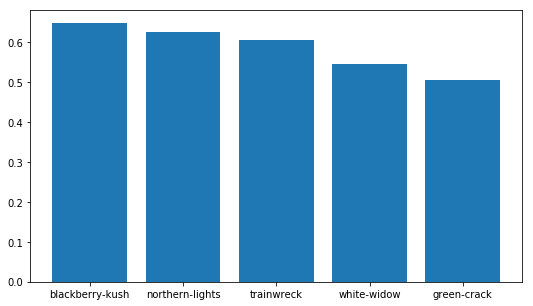

In [23]:
plt.figure(1, figsize=(30, 5))

plt.subplot(131)
plt.bar(names, score)

In [24]:
t_box = widgets.Text(
    placeholder='Type something',
    description='Make me:',
    disabled=False
)

In [25]:
slide = widgets.IntSlider(
    min=2,
    max=10,
    step=1,
    description='# Strains:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [26]:
button = widgets.Button(
    description="Let's get Lit!",
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='leaf'
)

In [62]:
ui = widgets.VBox([t_box, slide, button])
results = widgets.Output()

td = corpora.Dictionary.load('brand_new_strains.dict')
m = models.LsiModel(corpus_tfidf, id2word=tdict, num_topics=200)
i = MatrixSimilarity(model[corpus])
    
x = t_box.value
y = slide.value
    
@results.capture(clear_output=True)
def input_to_vec(x,y):
    vbow = tdict.doc2bow(x.lower().split())
    lsi = model[vbow]
    simimlarity = index[lsi]
    sims_sort = sorted(enumerate(simimlarity), key=lambda item: -item[1])
    top = sims_sort[:y]
    top_l =[]
    for i in top:
        top_l.append((strain_lookup[i[0]],i[1]))
    names = []
    score = []
    for i in top_l:
        names.append((i[0][7:]))
        score.append(i[1])
    nu_names = []
    for i in names:
        new_i = re.sub('[-]', ' ', i)
        nu_names.append(new_i)
    for i in score:
        print('Recomendation Strength = {:.2%}'.format(i))
    plt.figure(1, figsize=(50, 10))
    plt.subplot(131)
    plt.bar(nu_names, score, color='g')
    plt.show()

@button.on_click
def _click(b):
    input_to_vec(x,y)


display(ui, results)
button.on_click(_click)

Output()

In [28]:
import time

def thread_func(str_input,i):
    vbow = tdict.doc2bow(str_input.lower().split())
    lsi = model[vbow]
    simimlarity = index[lsi]
    sims_sort = sorted(enumerate(simimlarity), key=lambda item: -item[1])
    top = sims_sort[:i]
    top_l =[]
    for i in top:
        top_l.append((strain_lookup[i[0]],i[1]))
    print(top_l)

display('Display in main thread')
out = widgets.Output()

# Now the key: the container is displayed (while empty) in the main thread
display(out)

thread = threading.Thread(
    target=thread_func,
    args=("some text", out))
thread.start()

'Display in main thread'

Output()

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/Users/jordanweil/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/jordanweil/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-28-1b4878b61ab6>", line 8, in thread_func
    top = sims_sort[:i]
TypeError: slice indices must be integers or None or have an __index__ method



In [29]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])


## Doc2Vec work

In [30]:
def df_2_list_strings(df):
    strain_list = []
    #biglist = []
    cols = df.columns
    for i in cols:
        strain_revs = df[i].dropna().tolist()
        strain_list.append(strain_revs)

    return strain_list

st_list = df_2_list_strings(tr)

In [31]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(st_list)]

In [32]:
documents

[TaggedDocument(words=['purchased sqdc quebec blue dream aurora thc bought thought would strong sensitive thc loaded utilian g blue dream manit great felt mild head high came almost immediatly felt calm happy slightly uplifted energetic like pure sativa minute felt even relaxed throughout', 'ehlers danlos syndrome constantly battling chronic pain blue dream one best come across relieve pain day time use also fight number stemming ailment ed', 'tried first time today took two small hit vape waited minute thought hadnt vaped enough kicked high relaxing still get good head buzz well great chilling couch also productive want took almost pain away kicked happy blue dream', 'dream right try smoking bed youll good night rest classic og kush blue dream forever brighten blue mood moon', 'got relaxed put chair set haze watching tvenjoyed', 'review vape im smoking actually cartridge abxi really looking forward trying fact maybe done thing read rave review couldnt wait get well tell feel pretty da

In [33]:
dv_model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4)

In [34]:
dv_model

In [35]:
dv_model.build_vocab(documents)

In [36]:
%time dv_model.train(documents, total_examples=dv_model.corpus_count, epochs=dv_model.epochs)

CPU times: user 62.1 ms, sys: 4.53 ms, total: 66.7 ms
Wall time: 65.2 ms


In [37]:
dv_model.infer_vector(['watch', 'movie', 'smoke', 'laugh', 'giggle', 'relax'])

array([ 4.7758091e-03, -4.2093027e-04,  3.6429011e-03, -3.4025158e-03,
       -1.5266697e-03,  4.7717402e-03, -2.0406484e-03, -1.0147166e-03,
       -3.7466672e-03, -2.7230771e-03, -2.4685911e-03,  9.5123803e-04,
       -2.1964943e-03,  1.5026773e-04,  9.5307396e-04, -1.7369878e-03,
       -6.4933777e-04,  4.4044848e-03,  1.4900344e-03, -4.0917085e-03,
        4.2135562e-03,  3.5600169e-03, -2.6179710e-04,  1.3287739e-03,
        1.8983381e-03, -5.0826534e-04,  1.8363039e-04,  1.5653984e-03,
        4.2526205e-03, -1.9588745e-03, -1.0977191e-03, -1.3266447e-03,
       -1.5534096e-03,  1.3394360e-03,  4.6284107e-04, -4.6110870e-03,
       -1.5537862e-03, -1.9965714e-04,  3.7968992e-03, -4.6584443e-03,
       -2.6295504e-03,  1.8965699e-03, -3.6002190e-03, -3.7120355e-04,
        2.7738765e-03,  4.2902641e-03,  1.9110594e-03,  2.0837474e-03,
       -4.9691969e-03,  3.5399063e-03, -4.2931624e-03,  2.1542876e-03,
        2.4269568e-03,  3.9645694e-03,  4.5476686e-03, -4.5717824e-03,
      

## Word 2 Vec Work

In [38]:
def cols_2_string_w2v(df):
    strain_list = []
    cols = df.columns
    for i in cols:
        strain = df[i].dropna().tolist()
        #strain_str = " ".join(strain)
        strain_list.append(strain)
    return strain_list

sents = cols_2_string_w2v(tr)
sents

[['purchased sqdc quebec blue dream aurora thc bought thought would strong sensitive thc loaded utilian g blue dream manit great felt mild head high came almost immediatly felt calm happy slightly uplifted energetic like pure sativa minute felt even relaxed throughout',
  'ehlers danlos syndrome constantly battling chronic pain blue dream one best come across relieve pain day time use also fight number stemming ailment ed',
  'tried first time today took two small hit vape waited minute thought hadnt vaped enough kicked high relaxing still get good head buzz well great chilling couch also productive want took almost pain away kicked happy blue dream',
  'dream right try smoking bed youll good night rest classic og kush blue dream forever brighten blue mood moon',
  'got relaxed put chair set haze watching tvenjoyed',
  'review vape im smoking actually cartridge abxi really looking forward trying fact maybe done thing read rave review couldnt wait get well tell feel pretty darn good rig

In [39]:
w2v = Word2Vec(col_string, size=20, min_count=1)  # train word-vectors
termsim_index = WordEmbeddingSimilarityIndex(w2v.wv)
dictionary = Dictionary(sents)
bow_corpus = [dictionary.doc2bow(document) for document in sents]
similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary)  # construct similarity matrix
docsim_index = SoftCosineSimilarity(bow_corpus, similarity_matrix)

In [40]:
query = 'watch movie with buddy'.split()  # make a query
sims = docsim_index[dictionary.doc2bow(query)]  # calculate similarity of query to each doc from bow_corpus

In [41]:
sims

array(0., dtype=float32)

In [42]:
docsim_index[dictionary.doc2bow(query)]

array(0., dtype=float32)

In [43]:
tfidf_1 = TfidfModel(dictionary=dictionary)
w2v_model = Word2Vec(col_string, workers=cpu_count(), min_count=5, size=300, seed=12345)
sim_index = WordEmbeddingSimilarityIndex(w2v_model.wv)
sim_matrix = SparseTermSimilarityMatrix(sim_index, dictionary, tfidf_1, nonzero_limit=100)

In [44]:
sentence_obama = 'I want to go ski and get high with friends in the mountains'.lower().split()
sentence_president = 'Play videogames with the friends and relax '.lower().split()
sentence_orange = 'for recovery after a long days workout'.lower().split()

download('stopwords')  # Download stopwords list.

# Remove stopwords.
stop_words = stopwords.words('english')
sentence_obama = [w for w in sentence_obama if w not in stop_words]
sentence_president = [w for w in sentence_president if w not in stop_words]
sentence_orange = [w for w in sentence_orange if w not in stop_words]

# Prepare a dictionary and a corpus.
from gensim import corpora
documents = [sentence_obama, sentence_president, sentence_orange]
dictionary = corpora.Dictionary(documents)

# Convert the sentences into bag-of-words vectors.
sentence_obama = dictionary.doc2bow(sentence_obama)
sentence_president = dictionary.doc2bow(sentence_president)
sentence_orange = dictionary.doc2bow(sentence_orange)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordanweil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
import gensim.downloader as api
w2v = Word2Vec(col_string, size=20, min_count=1)  # train word-vectors
termsim_index = WordEmbeddingSimilarityIndex(w2v.wv)
similarity_index = WordEmbeddingSimilarityIndex(w2v_model)
similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary)


similarity = similarity_matrix.inner_product(sentence_obama, sentence_president, normalized=True)

AssertionError: 

In [ ]:
similarity = similarity_matrix.inner_product(documents, normalized=True)
print('similarity = %.4f' % similarity)

# Soft Cosine Sim Measures

In [ ]:
def softcossim(query, documents):
    tokens = query.lower().split()
    stop_words = stopwords.words('english')
    new_q = [w for w in tokens if w not in stop_words]    # Compute Soft Cosine Measure between the query and the documents.
    query = tfidf[dictionary.doc2bow(tokens)]
    index = SoftCosineSimilarity(
        tfidf[[dictionary.doc2bow(document) for document in documents]],
        similarity_matrix)
    
    similarities = index[query]
    return similarities

In [ ]:
#w2v = Word2Vec(col_string, size=20, min_count=1)  # train word-vectors
#termsim_index = WordEmbeddingSimilarityIndex(w2v.wv)
#dictionary = Dictionary(sents)
#bow_corpus = [dictionary.doc2bow(document) for document in sents]
#similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary)  # construct similarity matrix
#docsim_index = SoftCosineSimilarity(bow_corpus, similarity_matrix)

In [ ]:
softcossim('play video games with my friends and relax', sents)

# Random choice model

In [ ]:
def cols_2_string_w2v(df):
    strain_list = []
    cols = df.columns
    for i in cols:
        strain = df[i].dropna().tolist()
        #strain_str = " ".join(strain)
        strain_list.append(strain)
    return strain_list

sents = cols_2_string_w2v(tr)
sents

In [ ]:
tokens = query.lower().split()
    stop_words = stopwords.words('english')
    new_q = [w for w in tokens if w not in stop_words]

In [ ]:
rp_dictionary = Dictionary(sents)  # fit dictionary
rp_corpus = [rp_dictionary.doc2bow(text) for text in sents]  # convert texts to BoW format

In [ ]:
rpmodel = RpModel(rp_corpus, id2word=rp_dictionary) 

In [ ]:
rpmodel[rp_corpus[4]]

# Log entropy model 

In [ ]:
dct = Dictionary(sents)  # fit dictionary
corpus = [dct.doc2bow(row) for row in sents]  # convert to BoW format
model = LogEntropyModel(corpus)  # fit model
vector = model[corpus[2]]  # apply model to document

In [ ]:
vector

In [ ]:
len(corpus[2])

In [ ]:
corpus[2]

## Add the TextRank, Keyword rank

In [ ]:
from gensim.summarization import keywords

text = '''Challenges in natural language processing frequently involve
speech recognition, natural language understanding, natural language
generation (frequently from formal, machine-readable logical forms),
connecting language and machine perception, dialog systems, or some
combination thereof.'''
keywords(text).split('\n')

In [ ]:
str(col_string)

In [ ]:
gensim.summarization.keywords.(col_string)